# Project on the Titanic Dataset

### Importing important libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#uploading the dataset
titanic = pd.read_csv('titanic_full.csv')

In [3]:
#getting an insight of the data
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
#information about columns
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [5]:
#checking the missing values
titanic.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [6]:
round((titanic.isnull().sum()/titanic.isnull().count())*100)

PassengerId     0.0
Survived        0.0
Pclass          0.0
Name            0.0
Sex             0.0
Age            20.0
SibSp           0.0
Parch           0.0
Ticket          0.0
Fare            0.0
Cabin          77.0
Embarked        0.0
dtype: float64

In [7]:
# dropping Cabin column as 77% values are missing
titanic.drop('Cabin',axis=1,inplace=True)

In [8]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             1
Embarked         2
dtype: int64

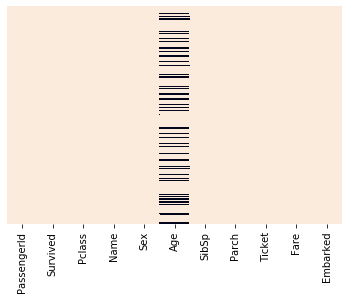

In [9]:
#looking at missing values graphically
sns.heatmap(titanic.isnull(),cmap=('rocket_r'),yticklabels=False,cbar=False)

In [10]:
# Building a correlation matrix
corr_matrix=titanic.corr()

In [11]:
# To fill missing values in Age, looking at the correlation of Age with other variables
corr_matrix['Age'].sort_values(ascending=False)

Age            1.000000
Fare           0.178740
PassengerId    0.028814
Survived      -0.053695
Parch         -0.150917
SibSp         -0.243699
Pclass        -0.408106
Name: Age, dtype: float64

It looks like, Age  has a negative correlation with Pclass

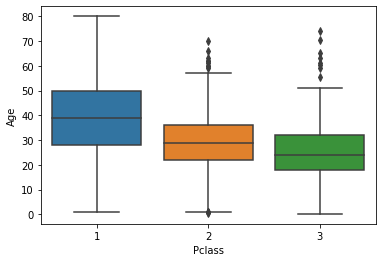

In [12]:
# Plotting Age and Pclass graphically for more info
sns.boxplot(x='Pclass',y='Age',data=titanic)

Clearly a relation, as we can see the difference in mean ages of different classes

In [13]:
#Finding the mean age of different classes
titanic['Age'].groupby(titanic['Pclass']).mean()

Pclass
1    39.159930
2    29.506705
3    24.816367
Name: Age, dtype: float64

In [14]:
# Making a function to impute the missing values according to their Pclass
def agefiller(age_pclass):
    Age= age_pclass[0]
    Pclass= age_pclass[1]
    if pd.isnull(Age):
        if Pclass ==1:
            return 39
        elif Pclass ==2:
            return 29
        else:
            return 25
    else:
        return Age

    

In [15]:
# Applying the function
titanic['Age'] = titanic[['Age','Pclass']].apply(agefiller,axis=1)

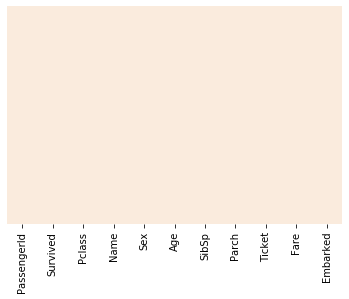

In [16]:
# Checking the heatmap of Missing values again
sns.heatmap(titanic.isnull(),cmap=('rocket_r'),yticklabels=False,cbar=False)

In [17]:
# looking at the remaining missing values in other columns
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       2
dtype: int64

In [18]:
#filling the missing value in fare with mean
mean = titanic['Fare'].mean()
titanic['Fare'].fillna(mean,inplace=True)


In [19]:
titanic['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [20]:
#filling the missing value in embarked with 'S' as S is the mode

titanic['Embarked'].fillna('S',inplace=True)

In [21]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Embarked     1309 non-null   object 
dtypes: float64(2), int64(5), object(4)
memory usage: 112.6+ KB


### EDA

Text(0.5, 1.0, 'Embarked')

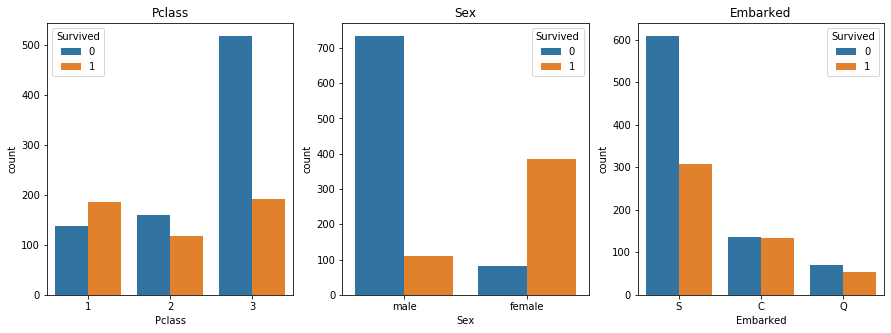

In [22]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

sns.countplot(x='Pclass',hue='Survived',data=titanic,ax=ax[0])
ax[0].set_title("Pclass")

sns.countplot(x='Sex',hue='Survived',data=titanic,ax=ax[1])
ax[1].set_title("Sex")

sns.countplot(x='Embarked',hue='Survived',data=titanic,ax=ax[2])
ax[2].set_title("Embarked")

It looks like a person from Pclass 3 is more likely to be die <br />
Also it can be interpreted that females are more likely to be survive.<br />
And people Embarked from S are more likely to die.

## Creating Dummies

In [23]:
# looking at the columns
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,25.0,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


In [24]:
#creating dummies in Sex column
sex_mapping = {"male": 0, "female": 1}
titanic['Sex'] = titanic['Sex'].map(sex_mapping)

In [25]:
##creating dummies in Embarked column
embark_mapping = {"S": 0, "C": 1,"Q":2}
titanic['Embarked'] = titanic['Embarked'].map(embark_mapping)

### Standardising the numerical columns

In [26]:
# Importing StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(titanic[['Age','Fare']])

In [27]:
titanic[['Age','Fare']] = scaler.transform(titanic[['Age', 'Fare']])

In [28]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,-0.561918,1,0,A/5 21171,-0.503595,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0.658575,1,0,PC 17599,0.734503,1
2,3,1,3,"Heikkinen, Miss. Laina",1,-0.256795,0,0,STON/O2. 3101282,-0.490544,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0.429733,1,0,113803,0.382925,0
4,5,0,3,"Allen, Mr. William Henry",0,0.429733,0,0,373450,-0.488127,0


In [29]:
# Dropping unnecessary columns
titanic.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,-0.561918,1,0,-0.503595,0
1,1,1,1,0.658575,1,0,0.734503,1
2,1,3,1,-0.256795,0,0,-0.490544,0
3,1,1,1,0.429733,1,0,0.382925,0
4,0,3,0,0.429733,0,0,-0.488127,0


## Machine Learning

In [30]:
# Separating features from the result

X = titanic.drop('Survived',axis=1)
y = titanic['Survived']

In [31]:
# Importing train_test_split
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [33]:
# Importing classifiers

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
from sklearn.svm import SVC
svc = SVC()
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100)
from sklearn.metrics import classification_report

In [34]:
logreg.fit(X_train,y_train)
logreg_pred = logreg.predict(X_test)
print(classification_report(y_test,logreg_pred))

              precision    recall  f1-score   support

           0       0.89      0.88      0.89       269
           1       0.81      0.82      0.81       163

    accuracy                           0.86       432
   macro avg       0.85      0.85      0.85       432
weighted avg       0.86      0.86      0.86       432



In [35]:
tree.fit(X_train,y_train)
tree_pred = tree.predict(X_test)
print(classification_report(y_test,tree_pred))

              precision    recall  f1-score   support

           0       0.87      0.82      0.85       269
           1       0.73      0.80      0.77       163

    accuracy                           0.81       432
   macro avg       0.80      0.81      0.81       432
weighted avg       0.82      0.81      0.82       432



In [36]:
svc.fit(X_train,y_train)
svc_pred =svc.predict(X_test)
print(classification_report(y_test,svc_pred))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       269
           1       0.84      0.82      0.83       163

    accuracy                           0.88       432
   macro avg       0.87      0.86      0.87       432
weighted avg       0.87      0.88      0.87       432



In [37]:
forest.fit(X_train,y_train)
forest_pred = forest.predict(X_test)
print(classification_report(y_test,forest_pred))

              precision    recall  f1-score   support

           0       0.88      0.85      0.87       269
           1       0.76      0.82      0.79       163

    accuracy                           0.84       432
   macro avg       0.82      0.83      0.83       432
weighted avg       0.84      0.84      0.84       432



In the above classification reports of different models, SVC has the highest accuracy of 88%